EMOTION CLASSIFICATION

In [1]:
import cv2 as cv
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

import warnings
warnings.filterwarnings("ignore")

In [74]:
list=["Contempt","Anger","Disgust","Embarrass","Fear","Joy","Neutral","Pride","Sadness","Surprise"]

for j in list:

    import os
    import shutil
    
    path = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/DATA/UNIVERSITY OF AMSTREADAM/COMBINED FULL DATA/'
    destination = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/'+j+'/'


        #check if directory exist, if not create it
    try:
        os.makedirs(destination)
    except:
        print ("Directory already exist, images will be written in same folder")
    
    
    files = []
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path,i)) and j in i:
            files.append(i)
    
    for f in files:
        shutil.copy(path + f, destination + f)

In [75]:
list=["Contempt","Anger","Disgust","Embarrass","Fear","Joy","Neutral","Pride","Sadness","Surprise"]
for j in list:
    count=1
    for i in os.listdir('D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/'+j+'/'):
        
        vidcap = cv.VideoCapture('D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/'+j+'/'+i)
        def getFrame(sec):
            vidcap.set(cv.CAP_PROP_POS_MSEC,sec*1000)
            hasFrames,image = vidcap.read()
            if hasFrames:
                cv.imwrite("D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/IMAGE/"+j+"/"+j+str(count)+".jpg", image)     # save frame as JPG file
            return hasFrames
        sec = 0
        frameRate = 0.216666 #//it will capture 13 frames per second
        
        success = getFrame(sec)
        while success:
            count = count + 1
            sec = sec + frameRate
            sec = round(sec, 2)
            success = getFrame(sec)

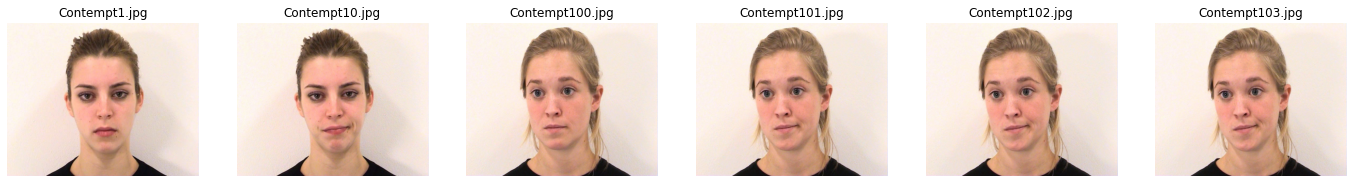

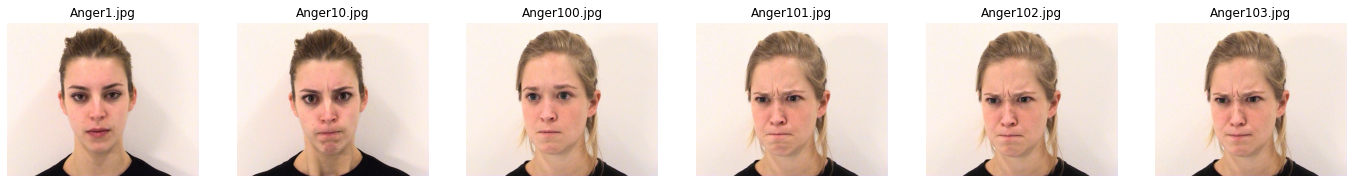

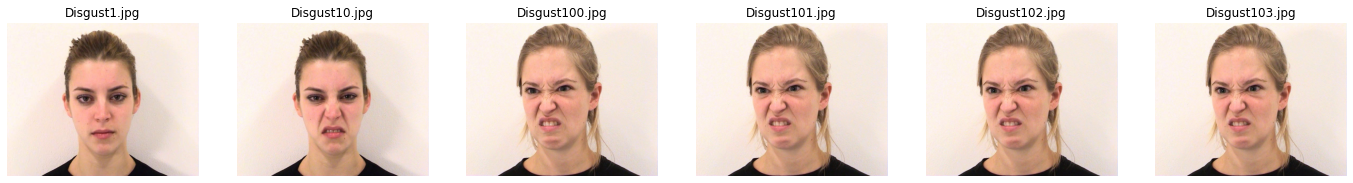

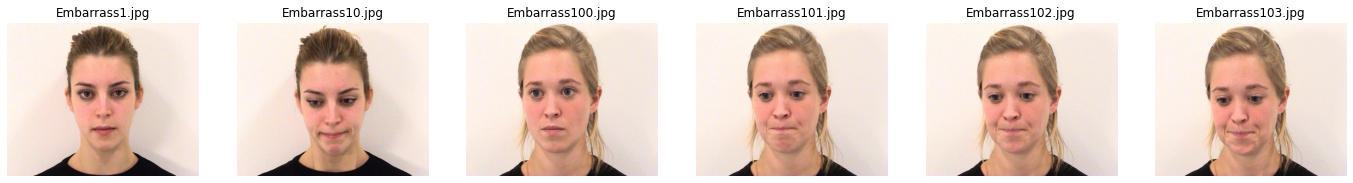

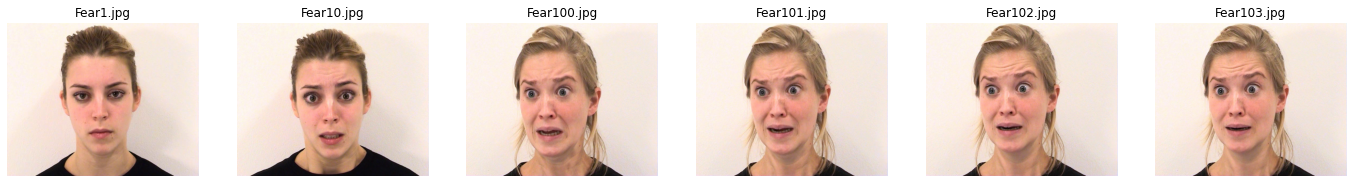

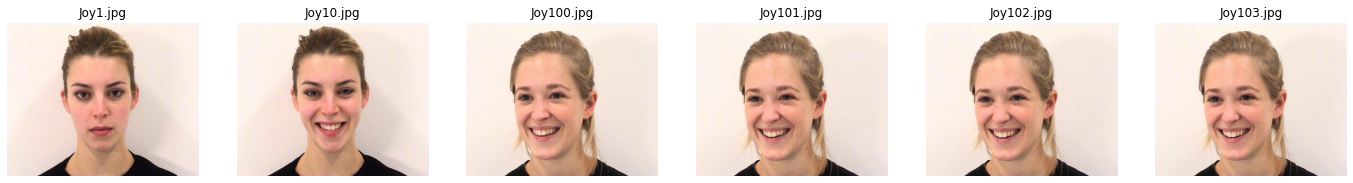

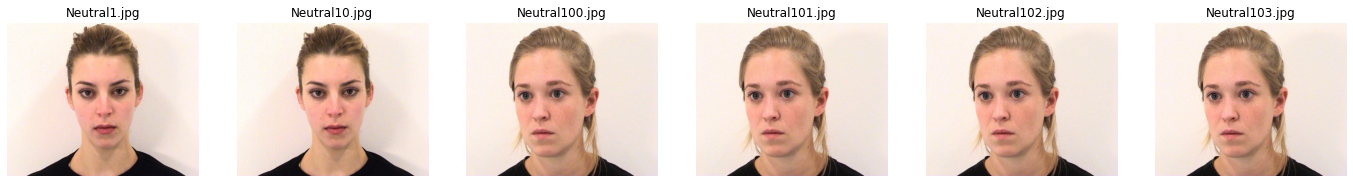

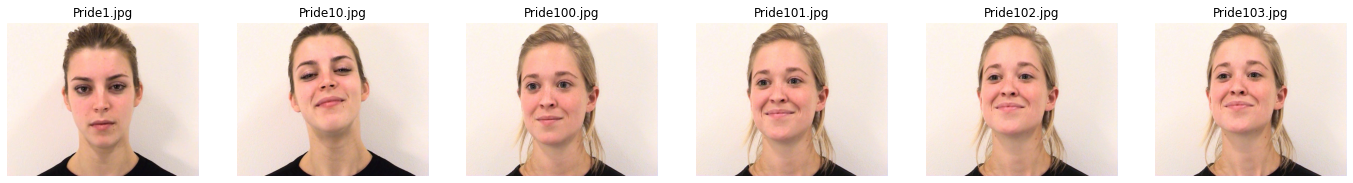

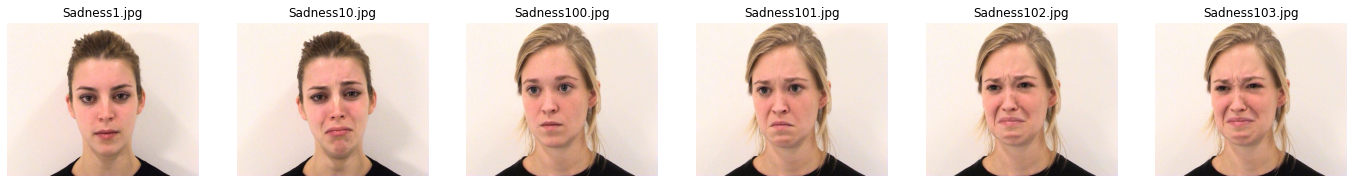

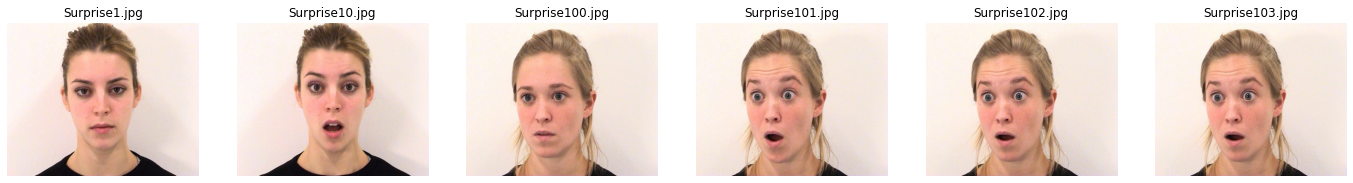

In [76]:
list=["Contempt","Anger","Disgust","Embarrass","Fear","Joy","Neutral","Pride","Sadness","Surprise"]
import glob
for i in list:

  pic_index = 0
  nrows =10
  ncols = 6

  fig = plt.gcf()
  fig.set_size_inches(ncols * 4, nrows * 4)
  pic_index += 6

  fnames = os.listdir('D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/IMAGE/'+i)
  pix=[os.path.join('D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/IMAGE/'+i+'/', fname) 
                 for fname in fnames[pic_index-6:pic_index]]



  for i, img_path in enumerate(pix):
  
    sp = plt.subplot(nrows, ncols, i + 1)  # Set up subplot
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(img_path.split("/")[-1])
  
  
  plt.show()
    
      
  


In [77]:

folder=["Contempt","Anger","Disgust","Embarrass","Fear","Joy","Neutral","Pride","Sadness","Surprise"]

for i in folder:
    # Replace mydir with the directory you want
    mydir = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/PREPROCESSED IMAGE/'+i
    #orginal path
    path='D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/IMAGE/'+i

    #check if directory exist, if not create it
    try:
        os.makedirs(mydir)
    except:
        print ("Directory already exist, images will be written in same folder")
    files = os.listdir(path)
    for fil in files:
        image=cv.imread(os.path.join(path,fil))
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        histogram_equalization_image=cv.equalizeHist(gray_image)
        cv.imwrite(os.path.join(mydir,fil),histogram_equalization_image) 

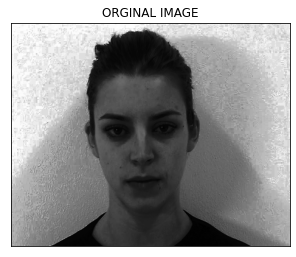

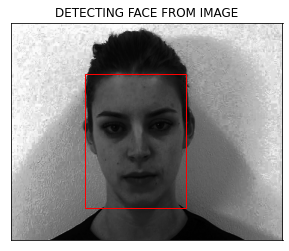

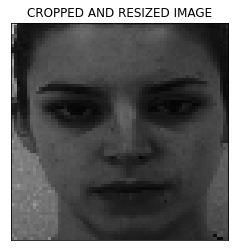

In [142]:
import matplotlib.pyplot as plt
import mtcnn
from PIL import Image
from matplotlib import pyplot

from numpy import asarray
from mtcnn.mtcnn import MTCNN

plt.figure(figsize=(5,5))

# load image from file
filename = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/PREPROCESSED IMAGE/Anger/Anger1.jpg'
image = Image.open(filename)
image = image.convert('RGB')
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.title("ORGINAL IMAGE")
plt.show()
pixels = asarray(image)


detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		box_img=ax.add_patch(rect)
		
	

		
	# show the plot
	
	return x,y,width,height,data,ax,box_img
 

x,y,width,height,data,ax,box_img=draw_image_with_boxes(filename, faces)


img=cv.imread(filename)
img=img[y:y+height, x:x+width]

dsize = (70, 70)

# resize image
final_img = cv.resize(img, dsize)




plt.imshow(pixels)
plt.title("DETECTING FACE FROM IMAGE")
plt.xticks([]), plt.yticks([])

plt.show(box_img)
plt.xticks([]), plt.yticks([])


plt.imshow(final_img)
plt.xticks([]), plt.yticks([])
plt.title("CROPPED AND RESIZED IMAGE")
plt.show()



In [ ]:

import matplotlib.pyplot as plt
import mtcnn
from PIL import Image
from matplotlib import pyplot

from numpy import asarray
from mtcnn.mtcnn import MTCNN

folder=["Contempt","Anger","Disgust","Embarrass","Fear","Joy","Neutral","Pride","Sadness","Surprise"]

for i in folder:
    # Replace mydir with the directory you want
    mydir = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/FINAL PREPROCESSED IMAGE/'+i
    #orginal path
    path='D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/PREPROCESSED IMAGE/'+i

    #check if directory exist, if not create it
    try:
        os.makedirs(mydir)
    except:
        print ("Directory already exist, images will be written in same folder")
    files = os.listdir(path)
    for fil in files:
        


       
        # load image from file
        image = Image.open(os.path.join(path,fil))
        image = image.convert('RGB')
        pixels = asarray(image)


        detector = MTCNN()
        # detect faces in the image
        faces = detector.detect_faces(pixels)

        # draw an image with detected objects
        def draw_image_with_boxes(filename, result_list):
            # load the image
            data = pyplot.imread(filename)
            # get the context for drawing boxes
            ax = pyplot.gca()
            # plot each box
            for result in result_list:
                # get coordinates
                x, y, width, height = result['box']
                # create the shape
                rect = Rectangle((x, y), width, height, fill=False, color='red')
                # draw the box
                box_img=ax.add_patch(rect)
            
                    
            # show the plot
            
            return x,y,width,height,data,ax,box_img
        

        x,y,width,height,data,ax,box_img=draw_image_with_boxes(os.path.join(path,fil), faces)


        img=cv.imread(os.path.join(path,fil))
        img=img[y:y+height, x:x+width]

        dsize = (70, 70)

        # resize image
        final_img = cv.resize(img, dsize)

        cv.imwrite(os.path.join(mydir,fil),final_img) 










In [22]:
list=["Contempt","Anger","Disgust","Embarrass","Fear","Joy","Neutral","Pride","Sad","Surprise"]

for j in list:

    import os
    import shutil
    
    path = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/VALIDATION DATA/'
    destination = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/VALIDATION DATA/'+j+'/'


    #     #check if directory exist, if not create it
    try:
        os.makedirs(destination)
    except:
        print ("Directory already exist, images will be written in same folder")
    
    files = []
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path,i)) and j in i:
            files.append(i)
    
    for f in files:
        shutil.copy(path + f, destination + f)

Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder


In [23]:

folder=["Contempt","Anger","Disgust","Embarrass","Fear","Joy","Neutral","Pride","Sad","Surprise"]

for i in folder:
    # Replace mydir with the directory you want
    mydir = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/PREPROCESSED VALIDATION IMAGE/'+i
    #orginal path
    path='D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/VALIDATION DATA/'+i

    #check if directory exist, if not create it
    try:
        os.makedirs(mydir)
    except:
        print ("Directory already exist, images will be written in same folder")
    files = os.listdir(path)
    for fil in files:
        image=cv.imread(os.path.join(path,fil))
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        histogram_equalization_image=cv.equalizeHist(gray_image)
        cv.imwrite(os.path.join(mydir,fil),histogram_equalization_image) 

Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder


Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder


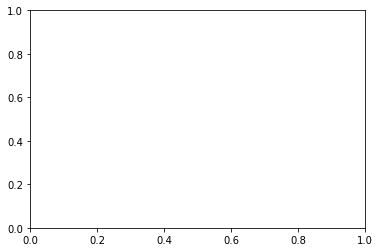

In [24]:

import matplotlib.pyplot as plt
import mtcnn
from PIL import Image,ImageOps
from matplotlib import pyplot

from numpy import asarray
from mtcnn.mtcnn import MTCNN
import cv2 as cv

folder=["Contempt","Anger","Disgust","Embarrass","Fear","Joy","Neutral","Pride","Sad","Surprise"]

for i in folder:
    # Replace mydir with the directory you want
    mydir = 'D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/FINAL PREPROCESSED VALIDATION IMAGE/'+i
    #orginal path
    path='D:/DATA ANALYTICS FOR BUSINESS/SEM 4/CAPSTONE PROJECT/CODE FRO PROJECT/DATA/PREPROCESSED VALIDATION IMAGE/'+i

    #check if directory exist, if not create it
    try:
        os.makedirs(mydir)
    except:
        print ("Directory already exist, images will be written in same folder")
    files = os.listdir(path)
    for fil in files:
        


    
        # load image from file
        image = Image.open(os.path.join(path,fil),mode='r')

        gray_image = ImageOps.grayscale(image)
        histogram_equalization_image=ImageOps.equalize(gray_image, mask = None)
        # cv.imwrite(os.path.join(mydir,fil),histogram_equalization_image) 
        
        image = histogram_equalization_image.convert('RGB')
        pixels = asarray(image)


        detector = MTCNN()
        # detect faces in the image
        faces = detector.detect_faces(pixels)

        # draw an image with detected objects
        def draw_image_with_boxes(filename, result_list):
            # load the image
            data = pyplot.imread(filename)
            # get the context for drawing boxes
            ax = pyplot.gca()
            # plot each box
            for result in result_list:
                # get coordinates
                x, y, width, height = result['box']
                # create the shape
                rect = Rectangle((x, y), width, height, fill=False, color='red')
                # draw the box
                box_img=ax.add_patch(rect)
            
                    
            # show the plot
            
            return x,y,width,height,data,ax,box_img
        

        x,y,width,height,data,ax,box_img=draw_image_with_boxes(os.path.join(path,fil), faces)


        img=cv.imread(os.path.join(path,fil))
        img=img[y:y+height, x:x+width]

        dsize = (70, 70)

        # resize image
        final_img = cv.resize(img, dsize)

        cv.imwrite(os.path.join(mydir,fil),final_img) 








